# Computer Vision Lab_08
## Name :Waleed Usman
## ID: F22607011
### Feature Detection and Matching with OpenCV - Python

## 1. Harris Corner Detection

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread('/content/box1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

In [9]:
dst = cv2.dilate(dst, None)

image[dst > 0.01 * dst.max()] = [0, 0, 255]

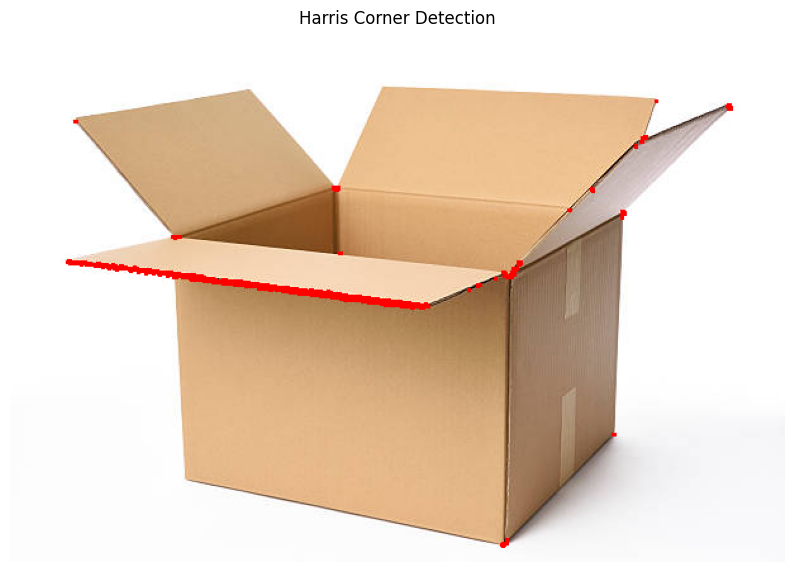

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

## 2. SIFT Feature Detection and Matching

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img1 = cv2.imread('/content/box1.jpg')
img2 = cv2.imread('/content/box2.jpg')

In [13]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [14]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray2, None)

In [16]:
bf = cv2.BFMatcher()

matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

In [17]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

good_matches = sorted(good_matches, key=lambda x: x.distance)

good_matches = good_matches[:50]

result = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, None, flags=2)


(np.float64(-0.5), np.float64(861.5), np.float64(418.5), np.float64(-0.5))

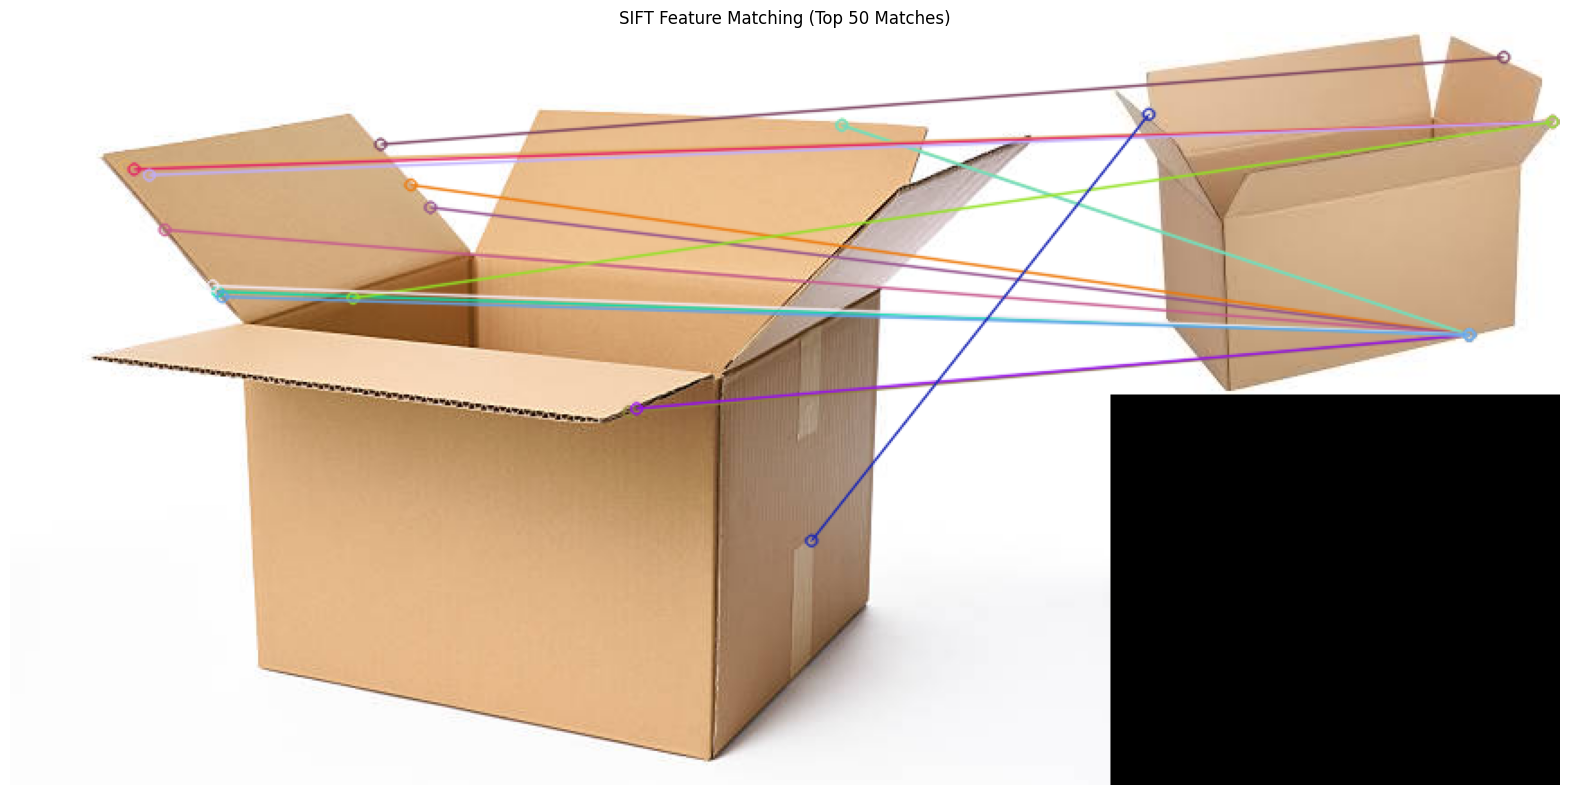

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('SIFT Feature Matching (Top 50 Matches)')
plt.axis('off')

## Summary and Explanation

### 1. Harris Corner Detection

In the first part, Harris Corner Detection is applied to find strong corner points in an image.  
The grayscale version of the image is processed using the Harris detector.  
The corners are identified by checking where the change in pixel intensity is significant in all directions.  
Detected corners are highlighted in red color on the original image.

**Main Steps:**
- Load the input image and convert it to grayscale.
- Apply Harris Corner Detection using `cv2.cornerHarris`.
- Dilate the detected corners to make them more visible.
- Threshold the corner response to select strong corners.
- Display the image with detected corners using Matplotlib.

**Key Functions Used:**
- `cv2.imread()` — to load image.
- `cv2.cvtColor()` — to convert image to grayscale.
- `cv2.cornerHarris()` — to detect corners.
- `cv2.dilate()` — to enhance corner points.
- `plt.imshow()` — to display final result.

---

### 2. SIFT Feature Detection and Matching

In the second part, SIFT (Scale-Invariant Feature Transform) is used to detect and match features between two different images.  
SIFT can find keypoints that are invariant to scale and rotation, making it very robust for matching real-world objects across different views.  
After detecting keypoints and descriptors, matching is performed using Brute-Force Matcher with KNN and Lowe’s ratio test to select the best matches.  
Finally, only the top 50 best matches (with the smallest distance) are drawn between the two images.

**Main Steps:**
- Load two images and convert both to grayscale.
- Detect SIFT keypoints and descriptors for both images.
- Match descriptors using Brute-Force Matcher and KNN (k=2).
- Apply Lowe's ratio test to filter good matches.
- Sort the matches by distance and select the top 50 matches.
- Draw and display the best matches using Matplotlib.

**Key Functions Used:**
- `cv2.SIFT_create()` — to create a SIFT detector.
- `detectAndCompute()` — to find keypoints and descriptors.
- `cv2.BFMatcher()` — for brute-force matching of descriptors.
- `knnMatch()` — to find two nearest neighbors for each feature.
- `cv2.drawMatches()` — to draw matches between two images.
- `plt.imshow()` — to display the matching results.

---

## Final Explanation

- Harris Corner Detection is mainly for **detecting strong corners** in a single image.
- SIFT is used for **matching keypoints across two different images**.
- Both techniques are important in computer vision for tasks like object detection, tracking, image stitching, and 3D reconstruction.
